<a href="https://colab.research.google.com/github/jabes-christian/GaleriaDeCircuito-Python/blob/main/Galerias_de_Circuitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Galeria de circuitos com Schemdraw**

In [25]:
!pip install schemdraw

# **Circuitos Analógicos:**

## 1 Exemplo: **Diagrama de Circuito**

In [3]:
import schemdraw
import schemdraw.elements as elm

In [4]:
d = schemdraw.Drawing()

In [5]:
V = d.add(elm.SourceV().label('V', loc='left'))
R = d.add(elm.Resistor().label('R').right())
C = d.add(elm.Capacitor().label('C').right())
L = d.add(elm.Inductor().label('L').right())

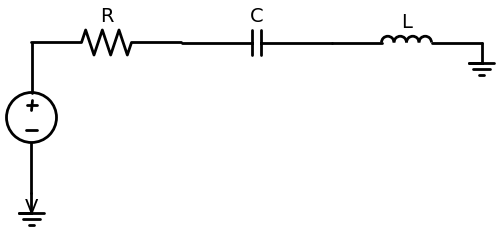

In [6]:
d.add(elm.Ground().at(V.start))
d.add(elm.Ground().at(L.end))
d.draw()

### **O resultado e esse circuito gerado automaticamente - simples e visual**

## 2 Exemplo: **Linha de Transmissão Infinita**

In [7]:
with schemdraw.Drawing(show=False) as d1:
    elm.Resistor()
    d1.push()
    elm.Capacitor().down()
    elm.Line().left()
    d1.pop()

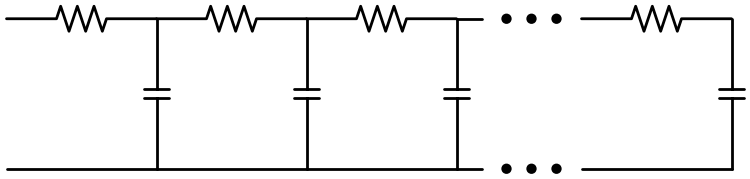

In [8]:
with schemdraw.Drawing() as d2:
    for i in range(3):
        elm.ElementDrawing(d1)

    d2.push()
    elm.Line().length(d2.unit/6)
    elm.DotDotDot()
    elm.ElementDrawing(d1)
    d2.pop()
    d2.here = (d2.here[0], d2.here[1]-d2.unit)
    elm.Line().right().length(d2.unit/6)
    elm.DotDotDot()

### **O resultado e esse circuito gerado automaticamente - simples e visual**

## 3 Exemplo: **Capacitor de descarga**

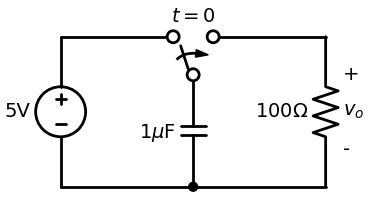

In [9]:
with schemdraw.Drawing() as d:
    V1 = elm.SourceV().label('5V')
    elm.Line().right(d.unit*.75)
    S1 = elm.SwitchSpdt2(action='close').up().anchor('b').label('$t=0$', loc='rgt')
    elm.Line().right(d.unit*.75).at(S1.c)
    elm.Resistor().down().label(r'$100\Omega$').label(['+','$v_o$','-'], loc='bot')
    elm.Line().to(V1.start)
    elm.Capacitor().at(S1.a).toy(V1.start).label(r'1$\mu$F').dot()

### **Mostra como conectar a um switch com âncoras.**

## 4 Exemplo: **Rede de capacitores**

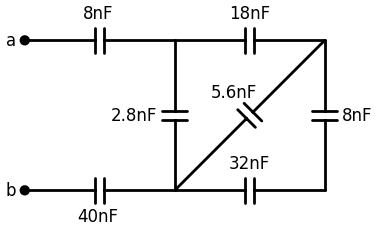

In [10]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    C1 = elm.Capacitor().label('8nF').idot().label('a', 'left')
    C2 = elm.Capacitor().label('18nF')
    C3 = elm.Capacitor().down().label('8nF', loc='bottom')
    C4 = elm.Capacitor().left().label('32nF')
    C5 = elm.Capacitor().label('40nF', loc='bottom').dot().label('b', 'left')
    C6 = elm.Capacitor().endpoints(C1.end, C5.start).label('2.8nF')
    C7 = (elm.Capacitor().endpoints(C2.end, C5.start)
              .label('5.6nF', loc='center', ofst=(-.3, -.1), halign='right', valign='bottom'))

### **Mostra como usar pontos de extremidade para especificar o posicionamento exato de início e fim.**

# **Circuitos Opamp**

## 1 Exemplo: **Invertendo Opamp**

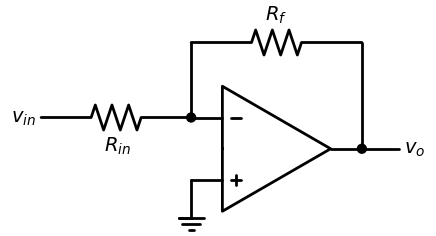

In [11]:
with schemdraw.Drawing() as d:
    op = elm.Opamp(leads=True)
    elm.Line().down(d.unit/4).at(op.in2)
    elm.Ground(lead=False)
    Rin = elm.Resistor().at(op.in1).left().idot().label('$R_{in}$', loc='bot').label('$v_{in}$', loc='left')
    elm.Line().up(d.unit/2).at(op.in1)
    elm.Resistor().tox(op.out).label('$R_f$')
    elm.Line().toy(op.out).dot()
    elm.Line().right(d.unit/4).at(op.out).label('$v_{o}$', loc='right')

### **é um circuito com AMPOP que permite realizar a soma de dois ou mais sinais.**

## 2 Exemplo: **Driver de cabo triaxial**

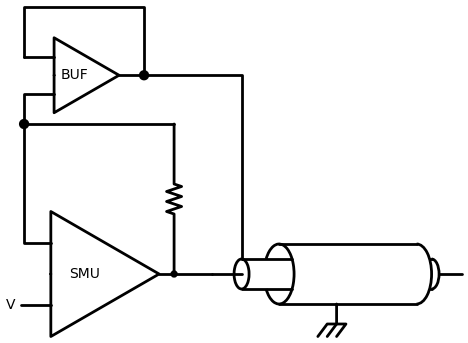

In [12]:
with schemdraw.Drawing() as d:
    d.config(fontsize=10)
    elm.Line().length(d.unit/5).label('V', 'left')
    smu = (elm.Opamp(sign=False).anchor('in2')
                      .label('SMU', 'center', ofst=[-.4, 0], halign='center', valign='center'))
    elm.Line().at(smu.out).length(.3)
    d.push()
    elm.Line().length(d.unit/4)
    triax = elm.Triax(length=5, shieldofststart=.75)
    d.pop()
    elm.Resistor().up().scale(0.6).idot()
    elm.Line().left().dot()
    elm.Wire('|-').to(smu.in1).hold()
    elm.Wire('|-').delta(d.unit/5, d.unit/5)
    buf = (elm.Opamp(sign=False).anchor('in2').scale(0.6)
                         .label('BUF', 'center', ofst=(-.4, 0), halign='center', valign='center'))

    elm.Line().left(d.unit/5).at(buf.in1)
    elm.Wire('n').to(buf.out, dx=.5).dot()
    elm.Wire('-|').at(buf.out).to(triax.guardstart_top)
    elm.GroundChassis().at(triax.shieldcenter)

### **permite transmitir sinais digitais de alta qualidade por meio de cabos triaxiais convencionais.**

# **Lógica Digital:**

## 1 Exemplo: **Meio Somador**

In [13]:
from schemdraw import logic

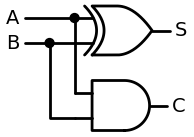

In [14]:
with schemdraw.Drawing() as d:
    d.config(unit=0.5)
    S = logic.Xor().label('S', 'right')
    logic.Line().left(d.unit*2).at(S.in1).idot().label('A', 'left')
    B = logic.Line().left().at(S.in2).dot()
    logic.Line().left().label('B', 'left')
    logic.Line().down(d.unit*3).at(S.in1)
    C = logic.And().right().anchor('in1').label('C', 'right')
    logic.Wire('|-').at(B.end).to(C.in2)

### **Observe que os somadores meio e inteiro definem a unidade de desenho como 0,5, para que as linhas não fiquem tão longas e tenham uma aparência melhor com portas lógicas.**

## 2 Exemplo: **Trava SR (Portões)**

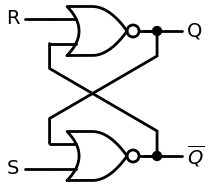

In [15]:
with schemdraw.Drawing() as d:
    g1 = logic.Nor()
    d.move_from(g1.in1, dy=-2.5)
    g2 = logic.Nor().anchor('in1')
    g1out = logic.Line().right(.25).at(g1.out)
    logic.Wire('N', k=.5).at(g2.in1).to(g1out.end).dot()
    g2out = logic.Line().right(.25).at(g2.out)
    logic.Wire('N', k=.5).at(g1.in2).to(g2out.end).dot()
    logic.Line().at(g1.in1).left(.5).label('R', 'left')
    logic.Line().at(g2.in2).left(.5).label('S', 'left')
    logic.Line().at(g1.out).right(.75).label('Q', 'right')
    logic.Line().at(g2.out).right(.75).label(r'$\overline{Q}$', 'right')

 ### **é um acessório de segurança que impede que o portão seja arrombado ou danificado.**

# **Estado sólido:**

## Exemplo: **Trava SR (Transistores)**

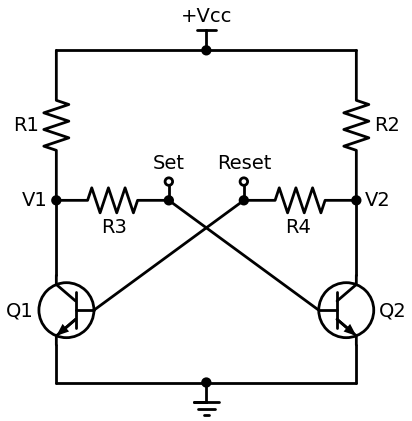

In [16]:
with schemdraw.Drawing() as d:
    Q1 = elm.BjtNpn(circle=True).reverse().label('Q1', 'left')
    Q2 = elm.BjtNpn(circle=True).at((d.unit*2, 0)).label('Q2')
    elm.Line().up(d.unit/2).at(Q1.collector)

    R1 = elm.Resistor().up().label('R1').hold()
    elm.Dot().label('V1', 'left')
    elm.Resistor().right(d.unit*.75).label('R3', 'bottom').dot()
    elm.Line().up(d.unit/8).dot(open=True).label('Set', 'right').hold()
    elm.Line().to(Q2.base)

    elm.Line().up(d.unit/2).at(Q2.collector)
    elm.Dot().label('V2', 'right')
    R2 = elm.Resistor().up().label('R2', 'bottom').hold()
    elm.Resistor().left(d.unit*.75).label('R4', 'bottom').dot()
    elm.Line().up(d.unit/8).dot(open=True).label('Reset', 'right').hold()
    elm.Line().to(Q1.base)

    elm.Line().down(d.unit/4).at(Q1.emitter)
    BOT = elm.Line().tox(Q2.emitter)
    elm.Line().to(Q2.emitter)
    elm.Dot().at(BOT.center)
    elm.Ground().at(BOT.center)

    TOP = elm.Line().endpoints(R1.end, R2.end)
    elm.Dot().at(TOP.center)
    elm.Vdd().at(TOP.center).label('+Vcc')

### **A saturação de um transistor é uma operação que pode ser comparada ao acionamento de uma chave, onde o transistor atua como um interruptor.**

# **Circuitos Integrados:**

## Exemplo: **Circuito piscante de LED 555**

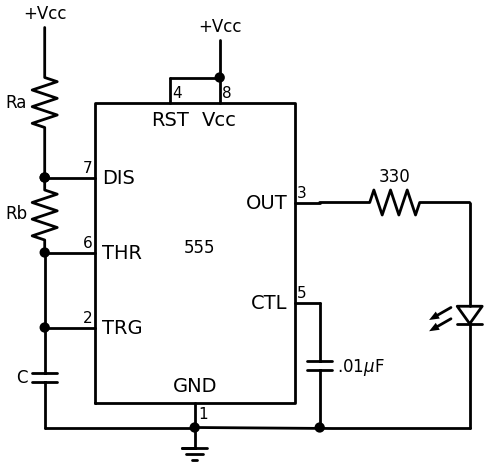

In [17]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    T = (elm.Ic()
         .side('L', spacing=1.5, pad=1.5, leadlen=1)
         .side('R', spacing=2)
         .side('T', pad=1.5, spacing=1)
         .pin(name='TRG', side='left', pin='2')
         .pin(name='THR', side='left', pin='6')
         .pin(name='DIS', side='left', pin='7')
         .pin(name='CTL', side='right', pin='5')
         .pin(name='OUT', side='right', pin='3')
         .pin(name='RST', side='top', pin='4')
         .pin(name='Vcc', side='top', pin='8')
         .pin(name='GND', side='bot', pin='1')
         .label('555'))
    BOT = elm.Ground().at(T.GND)
    elm.Dot()
    elm.Resistor().endpoints(T.DIS, T.THR).label('Rb').idot()
    elm.Resistor().up().at(T.DIS).label('Ra').label('+Vcc', 'right')
    elm.Line().endpoints(T.THR, T.TRG)
    elm.Capacitor().at(T.TRG).toy(BOT.start).label('C')
    elm.Line().tox(BOT.start)
    elm.Capacitor().at(T.CTL).toy(BOT.start).label(r'.01$\mu$F', 'bottom').dot()
    elm.Dot().at(T.DIS)
    elm.Dot().at(T.THR)
    elm.Dot().at(T.TRG)
    elm.Line().endpoints(T.RST,T.Vcc).dot()
    elm.Line().up(d.unit/4).label('+Vcc', 'right')
    elm.Resistor().right().at(T.OUT).label('330')
    elm.LED().flip().toy(BOT.start)
    elm.Line().tox(BOT.start)

### **É um circuito que usa o circuito integrado (CI) 555 para fazer LEDs piscarem. O CI 555 é um temporizador, oscilador e gerador de pulso.**

# **Processamento de Sinal**

## Exemplo: **Várias Redes**

In [18]:
from schemdraw import dsp

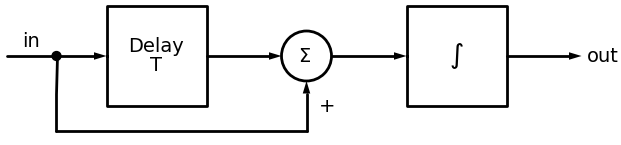

In [19]:
with schemdraw.Drawing() as d:
    dsp.Line().length(d.unit/3).label('in')
    inpt = dsp.Dot()
    dsp.Arrow().length(d.unit/3)
    delay = dsp.Box(w=2, h=2).anchor('W').label('Delay\nT')
    dsp.Arrow().right(d.unit/2).at(delay.E)
    sm = dsp.SumSigma()
    dsp.Arrow().at(sm.E).length(d.unit/2)
    intg = dsp.Box(w=2, h=2).anchor('W').label(r'$\int$')
    dsp.Arrow().right(d.unit/2).at(intg.E).label('out', loc='right')
    dsp.Line().down(d.unit/2).at(inpt.center)
    dsp.Line().tox(sm.S)
    dsp.Arrow().toy(sm.S).label('+', loc='bot')

# **Fluxograma**

## Exemplo: **Diagrama de Fluxo Lógico**

In [21]:
from schemdraw import flow

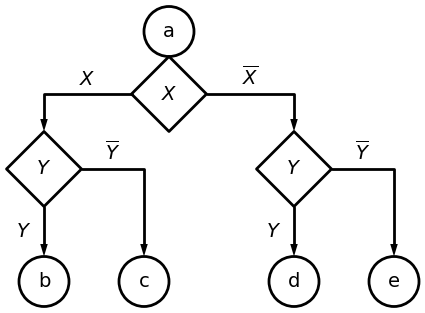

In [22]:
with schemdraw.Drawing(unit=1) as dwg:
    a = flow.Circle(r=.5).label('a')
    x = flow.Decision(w=1.5, h=1.5).label('$X$').at(a.S).anchor('N')
    elm.RightLines(arrow='->').at(x.E).label(r'$\overline{X}$')
    y1 = flow.Decision(w=1.5, h=1.5).label('$Y$')
    dwg.move_from(y1.N, dx=-5)
    y2 = flow.Decision(w=1.5, h=1.5).label('$Y$')
    elm.RightLines(arrow='->').at(x.W).to(y2.N).label('$X$')
    elm.Arrow().at(y2.S).label('$Y$')
    b = flow.Circle(r=.5).label('b')
    dwg.move_from(b.N, dx=2)
    c = flow.Circle(r=.5).label('c')
    elm.RightLines(arrow='->').at(y2.E).to(c.N).label(r'$\overline{Y}$')
    elm.Arrow().at(y1.S).label('$Y$')
    d = flow.Circle(r=.5).label('d')
    dwg.move_from(d.N, dx=2)
    e = flow.Circle(r=.5).label('e')
    elm.RightLines(arrow='->').at(y1.E).to(e.N).label(r'$\overline{Y}$')

# **Estilos**

## 1 Exemplo: **Círculo de resistores**

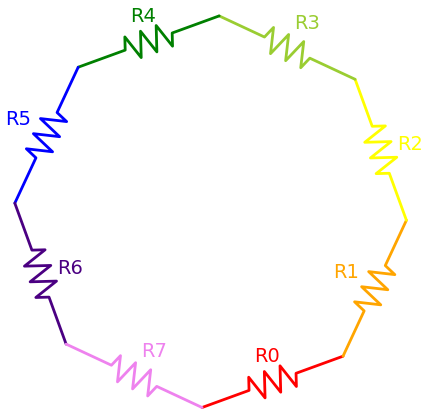

In [23]:
with schemdraw.Drawing() as d:
    for i, color in enumerate(['red', 'orange', 'yellow', 'yellowgreen', 'green', 'blue', 'indigo', 'violet']):
        elm.Resistor().theta(45*i+20).color(color).label('R{}'.format(i))

### **Usa cores nomeadas em um loop.**

## 2 Exemplo: **Desenhado à mão**

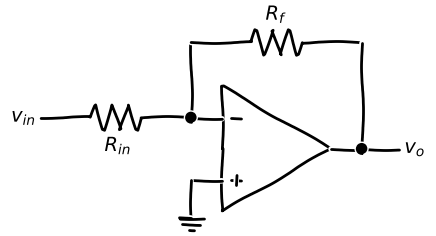

In [24]:
import matplotlib.pyplot as plt
plt.xkcd()

with schemdraw.Drawing() as d:
    op = elm.Opamp(leads=True)
    elm.Line().down().at(op.in2).length(d.unit/4)
    elm.Ground(lead=False)
    Rin = elm.Resistor().at(op.in1).left().idot().label('$R_{in}$', loc='bot').label('$v_{in}$', loc='left')
    elm.Line().up().at(op.in1).length(d.unit/2)
    elm.Resistor().tox(op.out).label('$R_f$')
    elm.Line().toy(op.out).dot()
    elm.Line().right().at(op.out).length(d.unit/4).label('$v_{o}$', loc='right')

### **E para mudar o ritmo, ative o modo XKCD do Matplotlib para uma aparência “desenhada à mão”.**